In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
from matplotlib import rc

rc('text', usetex=True)
rc('font', family='serif')

C:\Users\dcald\AppData\Local\Temp\ipykernel_18916\3619444410.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv("free-diffusion-evol.txt", delim_whitespace=True, header=None, encoding="utf-16")


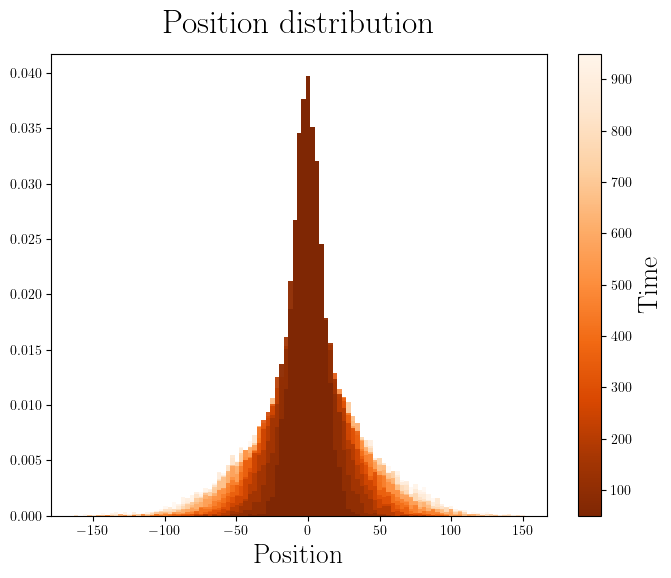

In [50]:


# Load data (adjust for your file)
data = pd.read_csv("free-diffusion-evol.txt", delim_whitespace=True, header=None, encoding="utf-16")

# Extract time values and positions
time_values = data.iloc[:, 0].values  # First column: time (used for color encoding)
position_data = data.iloc[:, 1:].values  # Remaining columns: positions

# Define histogram parameters
num_bins = 101  # Number of bins
bin_range = (np.min(position_data), np.max(position_data))  # Dynamic bin range
num_steps = len(time_values)  # Number of time steps

# Compute histograms
histograms = np.array([np.histogram(row, bins=num_bins, range=bin_range, density=True)[0] for row in position_data])
bin_edges = np.linspace(bin_range[0], bin_range[1], num_bins + 1)  # Ensure matching dimensions
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Get center of each bin

# Create figure
fig, ax = plt.subplots(figsize=(8, 6))

# Define colormap for time progression (old histograms dark, new histograms light)
cmap = plt.get_cmap("Oranges_r")  # Use orange tones
norm = mcolors.Normalize(vmin=time_values.min(), vmax=time_values.max())

# Reverse plotting order to prevent later times from overshadowing earlier ones
for i in reversed(range(num_steps)):  # Reverse order
    alpha_value = np.exp(-i / (num_steps/0.5))  # Exponential fade for older times
    ax.bar(bin_centers, histograms[i], width=(bin_edges[1] - bin_edges[0]), 
           color=cmap(norm(time_values[i])), alpha=alpha_value, edgecolor='none')

# Labels and formatting
ax.set_xlabel("Position", fontsize=20)
#ax.set_ylabel("", fontsize=14)
ax.set_title("Position distribution", fontsize=24,pad=15)

# Add color bar indicating time progression
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical')
cbar.set_label("Time", fontsize=20)

plt.savefig('free-diffusion-evol.pdf',format='pdf')
#plt.show()

